In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
## Install libraries
!pip install unidecode
!pip install pyvis
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import nltk
from nltk.corpus import stopwords
## download stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import sys
from tqdm import tqdm
import numpy as np
import pandas as pd

import transformers
from transformers import pipeline

import importlib
import knowledge_graphs
knowledge_graphs = importlib.reload(knowledge_graphs)


import matplotlib.pyplot as plt
import seaborn as sns
# warnings.filterwarnings('ignore')
%matplotlib inline

/content/drive/MyDrive/Omdena/cameroon_local_chapter/knowledge_graphs/src/knowledge_graphs.py:51: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  token_list.append(lowered_token)
/content/drive/MyDrive/Omdena/cameroon_local_chapter/knowledge_graphs/src/knowledge_graphs.py:51: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  token_list.append(lowered_token)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
path_data =  "/content/drive/MyDrive/Omdena/cameroon_local_chapter/data/"

In [7]:
df_data_seng = pd.read_csv(path_data+'data_from_search_engines_collection_1.csv')
df_data_seng

,Unnamed: 0,query,title,link,date,text
0,0,2016 Anglophone emergency civil war regions,'This is a genocide': villages burn as war rag...,https://www.theguardian.com/global-development...,30 may 2018,b'As rebel groups combat the clampdown on angl...
1,1,2017 Anglophone emergency civil war english speak,(Col 1) remote units | Western Sydney Universi...,https://www.westernsydney.edu.au/future-studen...,23 feb 2017,b'\xc2\xa0 ICS researcher Professor James Arva...
2,2,2016 Anglophone emergency civil war regions,(PDF) The Anglophone Problem in Cameroon - Res...,https://www.researchgate.net/publication/28641...,5 jul 2022,b''
3,3,2017 Anglophone emergency civil war regions,(PDF) The ramification of Cameroon's Anglophon...,https://www.researchgate.net/publication/35804...,24 ene 2022,b''
4,4,2018 Anglophone crisis civil war regions,- CRISIS IN THE REPUBLIC OF CAMEROONhttps://ww...,https://www.govinfo.gov/content/pkg/CHRG-115hh...,por R Orock · 2021,b''
...,...,...,...,...,...,...
915,150,2018 Cameroon crisis civil war children govern...,OP_GuardianPostCameroon16N...https://www.ohchr...,https://www.ohchr.org/Documents/Issues/IDPerso...,16 nov 2018,b''
916,151,2018 Cameroon crisis civil war children govern...,"Cameroon military, separatists blamed for 'gra...",https://www.aljazeera.com/news/2018/7/20/camer...,20 jul 2018,b'Anglophone separatists as well as government...
917,152,2018 Cameroon crisis civil war children govern...,Crisis in Cameroon - Caritas Internationalisht...,https://www.caritas.org/2018/05/cameroon/,15 may 2018,"b""refugees in Nigeria displaced in Cameroon pe..."
918,153,2018 Cameroon crisis civil war children govern...,"The raging war in the Cameroons, By Toyin Falo...",https://www.premiumtimesng.com/opinion/473334-...,13 jul 2021,"b'In January, the United Nations reported that..."


## Preprocessing

In [8]:
df_text_counts = pd.concat([df_data_seng['text'], df_data_seng['text'].apply(lambda x:len(x))], axis=1)
df_text_counts.columns = ['text', 'count']
df_text_counts = df_text_counts.sort_values('count')
df_text_counts

,text,count
775,b'',3
468,b'',3
849,b'',3
694,b'',3
105,b'',3
...,...,...
666,b'8X\xef\xbf\xbd|R\xef\xbf\xbd\x03\xef\xbf\xbd...,6697656
169,b'\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf...,8111387
155,b'+\x7f\xc8\x95\xef\xbf\xbdm\x7f\xef\xbf\xbd\x...,13912490
108,b'd\xef\xbf\xbd\xef\xbf\xbd`\xef\xbf\xbd\xef\x...,30966729


In [9]:
## drop duplicates
df_text_counts = df_text_counts.drop_duplicates()
df_text_counts.shape

(610, 2)

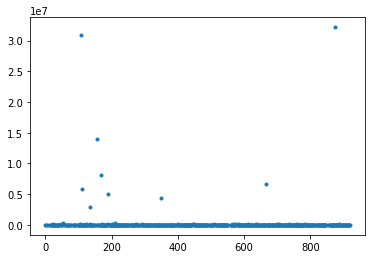

In [10]:
df_text_counts['count'].plot(style='.')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


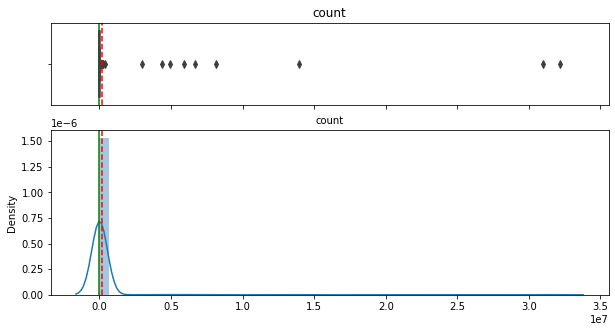

count    6.100000e+02
mean     1.949894e+05
std      1.969384e+06
min      3.000000e+00
25%      3.847500e+03
50%      6.823000e+03
75%      1.362300e+04
max      3.215722e+07
Name: count, dtype: float64

In [36]:
knowledge_graphs.boxhist(df_text_counts, 'count')
display(df_text_counts['count'].describe())

In [37]:
## Delete the last 9 samples that seen as outliers
df_text_counts = df_text_counts.iloc[0:-9]
df_text_counts.shape

(601, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


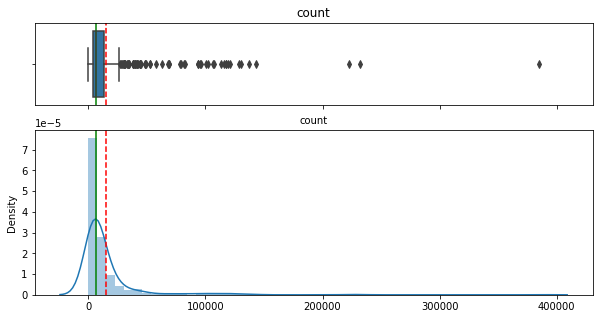

count       601.000000
mean      14788.286190
std       28979.178479
min           3.000000
25%        3791.000000
50%        6728.000000
75%       13035.000000
max      384725.000000
Name: count, dtype: float64

In [38]:
knowledge_graphs.boxhist(df_text_counts, 'count')
display(df_text_counts['count'].describe())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


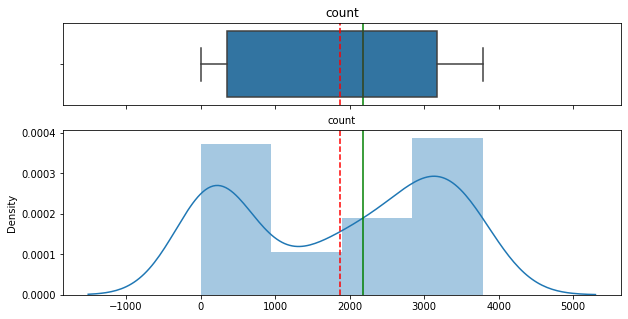

,count
count,150.000000
mean,1868.840000
std,1371.501353
min,3.000000
25%,352.000000
50%,2179.000000
75%,3166.500000
max,3788.000000


In [39]:
## analizing the data in the Q1
knowledge_graphs.boxhist(df_text_counts[df_text_counts['count']<3791], 'count')
display(df_text_counts[df_text_counts['count']<3791].describe())

In [40]:
## all the texts with lenght > Q1
df_text_counts = df_text_counts[df_text_counts['count']>352]
df_text_counts

,text,count
843,"b""To continue, please click the box below to l...",370
320,b'Battles and violent events\n Political event...,393
702,b'Battles and violent events\n Political event...,393
454,b'Battles and violent events\n Political event...,393
577,b'Battles and violent events\n Political event...,393
...,...,...
446,"b""\nAgainst\xc2\xa0a backdrop of bomb blasts, ...",136847
783,b'Official websites use .gov Secure .gov websi...,142856
736,b'Help us continue to fight human rights abuse...,222413
54,"b""\nSince October 2016, protests and strikes r...",231598


## Graph construction

In [ ]:
knowledge_graphs = importlib.reload(knowledge_graphs)

/content/drive/MyDrive/Omdena/cameroon_local_chapter/knowledge_graphs/src/knowledge_graphs.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (lowered_token is not '' or lowered_token is not ' ' or lowered_token is None) and lowered_token not in stopwords:
/content/drive/MyDrive/Omdena/cameroon_local_chapter/knowledge_graphs/src/knowledge_graphs.py:50: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (lowered_token is not '' or lowered_token is not ' ' or lowered_token is None) and lowered_token not in stopwords:
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
## preprocess for parts of speach
df_text_tmp = df_text_counts[["text"]].applymap(lambda x: knowledge_graphs.preprocess_text_ps(
        x[1:], stopwords=stop_words) if x is not None else None)
df_data_norm = df_data_seng[['link', 'title', 'date', 'text']].join(df_text_tmp, how='inner', rsuffix='_norm')

df_text_tmp = df_text_counts[["text"]].applymap(lambda x: knowledge_graphs.preprocess_text_ps(
        x[1:], stopwords=[]) if x is not None else None)
df_data_norm = df_data_norm.join(df_text_tmp, how='inner', rsuffix='_norm_graph')

df_data_norm['date'] = df_data_norm['date'].apply(lambda x: knowledge_graphs.clean_date(x))
df_data_norm

,link,title,date,text,text_norm,text_norm_graph
0,https://www.theguardian.com/global-development...,'This is a genocide': villages burn as war rag...,2018,b'As rebel groups combat the clampdown on angl...,rebel groups combat clampdown anglophone activ...,as rebel groups combat the clampdown on anglop...
1,https://www.westernsydney.edu.au/future-studen...,(Col 1) remote units | Western Sydney Universi...,2017,b'\xc2\xa0 ICS researcher Professor James Arva...,ics researcher professor james arvanitakis ka...,ics researcher professor james arvanitakis an...
6,https://edmontonjournal.com/news/national/10-3...,10/3 podcast: 29 charges in fatal Humboldt Bro...,2018,"b""On Friday RCMP announced that they have laid...",friday rcmp announced laid two dozen charges c...,on friday rcmp announced that they have laid m...
11,https://www.wits.ac.za/news/latest-news/opinio...,2022-04 - How language plunged Cameroon into d...,2022,b'Skip navigation and go to page content \n1 A...,skip navigation go page content n1 april 2022 ...,skip navigation and go to page content n1 apri...
16,http://www.fides.org/en/news/68889-AFRICA_CAME...,AFRICA/CAMEROON - Civil War creates lost gener...,2020,b' \n2022-10-24\n 9 hostages captured in the a...,n2022 10 24n 9 hostages captured attack churc...,n2022 10 24n 9 hostages captured in the attac...
...,...,...,...,...,...,...
914,https://www.brookings.edu/blog/order-from-chao...,Stabilizing Cameroon requires a sustained solu...,2020,b'As regional and international partners focus...,regional international partners focus counteri...,as regional and international partners focus o...
916,https://www.aljazeera.com/news/2018/7/20/camer...,"Cameroon military, separatists blamed for 'gra...",2018,b'Anglophone separatists as well as government...,anglophone separatists well government forces ...,anglophone separatists as well as government f...
917,https://www.caritas.org/2018/05/cameroon/,Crisis in Cameroon - Caritas Internationalisht...,2018,"b""refugees in Nigeria displaced in Cameroon pe...",refugees nigeria displaced cameroon percent re...,refugees in nigeria displaced in cameroon perc...
918,https://www.premiumtimesng.com/opinion/473334-...,"The raging war in the Cameroons, By Toyin Falo...",2021,"b'In January, the United Nations reported that...",january united nations reported 3000 people ki...,in january the united nations reported that ov...


In [42]:
zero_shot_classifier = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
kngraph = knowledge_graphs.Knowledge_graph(df_data_norm, zero_shot_classifier)

In [44]:
list_graphs_year = kngraph.build_grap(list_years=[2020], #2017, 2018, 2019, 2020, 2021, 2022 
                   max_n_nodes = 10, min_n_nodes = 5, 
                   importance_nodes = 0.5, importance_prediction=0.6,
                   sample_texts = 30, sample_sentences=30)

16      n2022 10 24n 9 hostages captured attack churc...
227        captain thomas e. griffin civil affairs of...
249    nur commitment end war bloodshed evident hope ...
317    advertisement political leadership disaster cr...
364    cameroon long drawn out neglected anglophone c...
545    cameroon struggles get bearings midst thecovid...
559    advertisement palgrave encyclopedia peace conf...
580    produced erudef center advancement women initi...
582    produced erudef center advancement women initi...
585    custom text obsession power prestige life prof...
588     produced erudef centre advancement women init...
598    nnnprintnn cameroon protesting criticism frenc...
633    help us continue fight human rights abuses .  ...
635    public eye magazinensee latest issue january 2...
641    stay independent free sustainable community ne...
642    prominent cameroonian human rights activist be...
645    ncameroonn 1 moren iom vision different nature...
649    least eight children kil


computing graph to  2020


  0%|          | 0/30 [00:00<?, ?it/s]


computing nodes to  2020



100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


clean nodes
(10, 2) (5, 2) (10, 2)
[['borden' 'scotia' '63x9391cite' 'journal' 'aceh']
 ['3' '2' '1' '1' '1']]
[['paper' 'build' 'learn' 'shake' 'say' 'review' 'effect' 'archive'
  'report' 'turn']
 ['3' '2' '2' '2' '2' '2' '2' '2' '2' '1']]
[['disaster' 'management' 'policy' 'recovery' 'oc' 'other' 'type'
  'challenge' 'catastrophe' 'mclean']
 ['4' '3' '2' '2' '2' '1' '1' '1' '1' '1']]
advertisement political leadership in disaster and crisis communication and management pp 63x9391cite as 268 accesses this chapter turns to the role of political actors in disasters and crises and the expectations of survivors and others regarding leadership support and sense making .  the pressure involved in these types of complex and rapidly evolving environments imposes further leadership challenges including a lack of time resources and factual information .  coupled with poor situational awareness political leaders are in uncharted territory where chaos replaces well orchestrated day to day routin

  0%|          | 0/30 [00:50<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
## Save graph
filename = 'graph_2020_by_doc_test.csv'
path_graph = "/content/drive/MyDrive/Omdena/cameroon_local_chapter/knowledge_graphs/graphs/"
df_graph = pd.concat(list_graphs_year)
df_graph

In [ ]:
df_graph.reset_index().to_csv(path_graph+filename)